In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
url = 'https://raw.githubusercontent.com/AcidTwinsn/challenge_telecom_Parte2/refs/heads/main/TelecomX_Limpio.csv'

df = pd.read_csv(url)
df.head()


IDCliente  Cancelacion     Genero  Jubilado Pareja Dependientes  \
0  0002-ORFBO            0   Femenino         0     S√≠           S√≠   
1  0003-MKNFE            0  Masculino         0     No           No   
2  0004-TLHLJ            1  Masculino         0     No           No   
3  0011-IGKFF            1  Masculino         1     S√≠           No   
4  0013-EXCHZ            1   Femenino         1     S√≠           No   

   Antiguedad ServicioTelefono MultiplesLineas ServicioInternet  ...  \
0           9               S√≠              No              DSL  ...   
1           9               S√≠              S√≠              DSL  ...   
2           4               S√≠              No     Fibra √ìptica  ...   
3          13               S√≠              No     Fibra √ìptica  ...   
4           3               S√≠              No     Fibra √ìptica  ...   

  ProteccionDispositivo SoporteTecnico SuscripcionTV SuscripcionPelis  \
0                    No             S√≠            S√≠               No   
1                    No             No            No               S√≠   
2                    S√≠             No            No               No   
3                    S√≠             No            S√≠               S√≠   
4                    No             S√≠            S√≠               No   

    Contrato FacturaOnline          MetodoPago CargoMensual CargoTotal  \
0     Un A√±o            S√≠   Cheque Por Correo         65.6     593.30   
1  Mes a Mes            No   Cheque Por Correo         59.9     542.40   
2  Mes a Mes            S√≠  Cheque Electr√≥nico         73.9     280.85   
3  Mes a Mes            S√≠  Cheque Electr√≥nico         98.0    1237.85   
4  Mes a Mes            S√≠   Cheque Por Correo         83.9     267.40   

   Cuentas_Diarias  
0         2.186667  
1         1.996667  
2         2.463333  
3         3.266667  
4         2.796667  

[5 rows x 22 columns]

In [47]:
print(df.isna().sum())

IDCliente                0
Cancelacion              0
Genero                   0
Jubilado                 0
Pareja                   0
Dependientes             0
Antiguedad               0
ServicioTelefono         0
MultiplesLineas          0
ServicioInternet         0
SeguridadOnline          0
RespaldoOnline           0
ProteccionDispositivo    0
SoporteTecnico           0
SuscripcionTV            0
SuscripcionPelis         0
Contrato                 0
FacturaOnline            0
MetodoPago               0
CargoMensual             0
CargoTotal               0
Cuentas_Diarias          0
dtype: int64


In [48]:
print(df.columns)

Index(['IDCliente', 'Cancelacion', 'Genero', 'Jubilado', 'Pareja',
       'Dependientes', 'Antiguedad', 'ServicioTelefono', 'MultiplesLineas',
       'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline',
       'ProteccionDispositivo', 'SoporteTecnico', 'SuscripcionTV',
       'SuscripcionPelis', 'Contrato', 'FacturaOnline', 'MetodoPago',
       'CargoMensual', 'CargoTotal', 'Cuentas_Diarias'],
      dtype='object')


In [49]:
df.shape[0]

7267

In [50]:
print(df.duplicated().sum())
print(df.info())
print(df.describe())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDCliente              7267 non-null   object 
 1   Cancelacion            7267 non-null   int64  
 2   Genero                 7267 non-null   object 
 3   Jubilado               7267 non-null   int64  
 4   Pareja                 7267 non-null   object 
 5   Dependientes           7267 non-null   object 
 6   Antiguedad             7267 non-null   int64  
 7   ServicioTelefono       7267 non-null   object 
 8   MultiplesLineas        7267 non-null   object 
 9   ServicioInternet       7267 non-null   object 
 10  SeguridadOnline        7267 non-null   object 
 11  RespaldoOnline         7267 non-null   object 
 12  ProteccionDispositivo  7267 non-null   object 
 13  SoporteTecnico         7267 non-null   object 
 14  SuscripcionTV          7267 non-null   object 
 15  Su

In [51]:
print("Distribuci√≥n de Cancelaci√≥n:")
print(df['Cancelacion'].value_counts())
print(f"\nPorcentajes:")
cancelacion_pct = df['Cancelacion'].value_counts(normalize=True) * 100
print(cancelacion_pct)

Distribuci√≥n de Cancelaci√≥n:
Cancelacion
0    5398
1    1869
Name: count, dtype: int64

Porcentajes:
Cancelacion
0    74.280996
1    25.719004
Name: proportion, dtype: float64


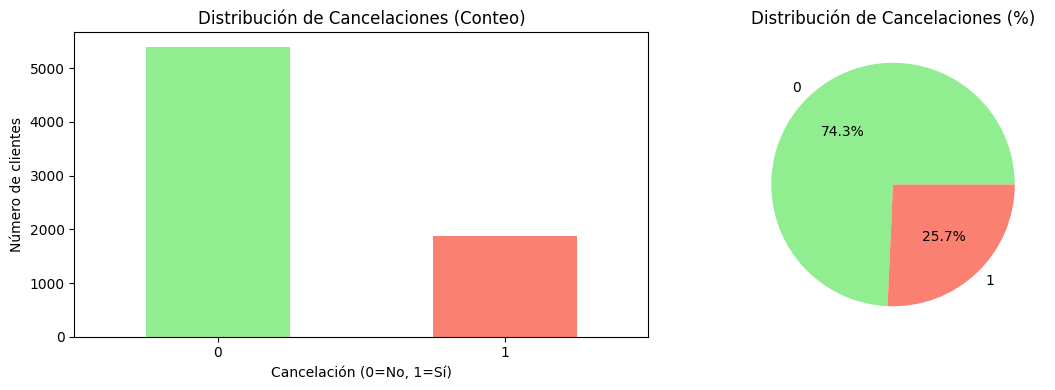

In [52]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Cancelacion'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Distribuci√≥n de Cancelaciones (Conteo)')
plt.xlabel('Cancelaci√≥n (0=No, 1=S√≠)')
plt.ylabel('N√∫mero de clientes')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
cancelacion_pct.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Distribuci√≥n de Cancelaciones (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [53]:
# Separar X y y
X = df.drop(["IDCliente", "Cancelacion"], axis=1)
y = df["Cancelacion"]

# Dividir en train/test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [54]:
print(f"Tama√±o total del dataset: {len(df)}")
print(f"Tama√±o de entrenamiento: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tama√±o de prueba: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nDistribuci√≥n en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)

print(f"\nDistribuci√≥n en conjunto de prueba:")
print(y_test.value_counts(normalize=True) * 100)

Tama√±o total del dataset: 7267
Tama√±o de entrenamiento: 5086 (70.0%)
Tama√±o de prueba: 2181 (30.0%)

Distribuci√≥n en conjunto de entrenamiento:
Cancelacion
0    74.282344
1    25.717656
Name: proportion, dtype: float64

Distribuci√≥n en conjunto de prueba:
Cancelacion
0    74.277854
1    25.722146
Name: proportion, dtype: float64


In [55]:
cat_cols = ["Genero", "Jubilado", "Pareja", "Dependientes",
            "ServicioTelefono", "MultiplesLineas", "ServicioInternet",
            "SeguridadOnline", "RespaldoOnline", "ProteccionDispositivo",
            "SoporteTecnico", "SuscripcionTV", "SuscripcionPelis",
            "Contrato", "FacturaOnline", "MetodoPago"]

num_cols = ["Antiguedad", "CargoMensual", "CargoTotal", "Cuentas_Diarias"]

Matriz de correlaci√≥n - Variables num√©ricas:
                 Antiguedad  CargoMensual  CargoTotal  Cuentas_Diarias  \
Antiguedad         1.000000      0.247982    0.825407         0.247982   
CargoMensual       0.247982      1.000000    0.652211         1.000000   
CargoTotal         0.825407      0.652211    1.000000         0.652211   
Cuentas_Diarias    0.247982      1.000000    0.652211         1.000000   
Cancelacion       -0.344079      0.189866   -0.193345         0.189866   

                 Cancelacion  
Antiguedad         -0.344079  
CargoMensual        0.189866  
CargoTotal         -0.193345  
Cuentas_Diarias     0.189866  
Cancelacion         1.000000  


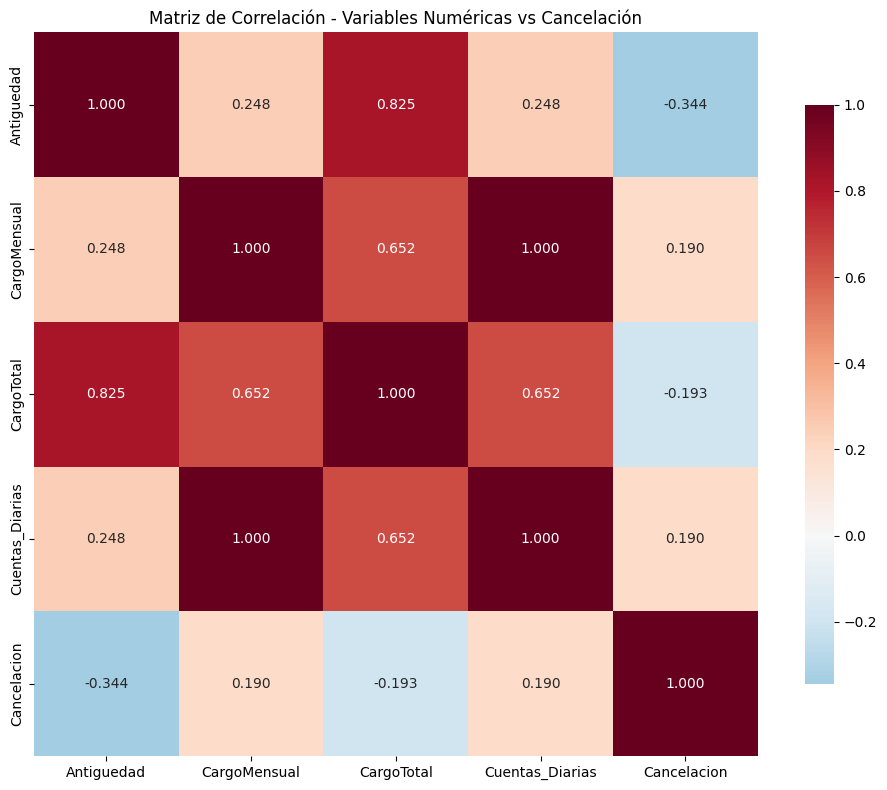

In [56]:
print("Matriz de correlaci√≥n - Variables num√©ricas:")
num_cols_with_target = num_cols + ["Cancelacion"]
df_num = df[num_cols_with_target]
corr_matrix = df_num.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".3f",
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Matriz de Correlaci√≥n - Variables Num√©ricas vs Cancelaci√≥n")
plt.tight_layout()
plt.show()

In [57]:
importantes_cat = ["Contrato", "MetodoPago", "ServicioInternet", "Pareja"]


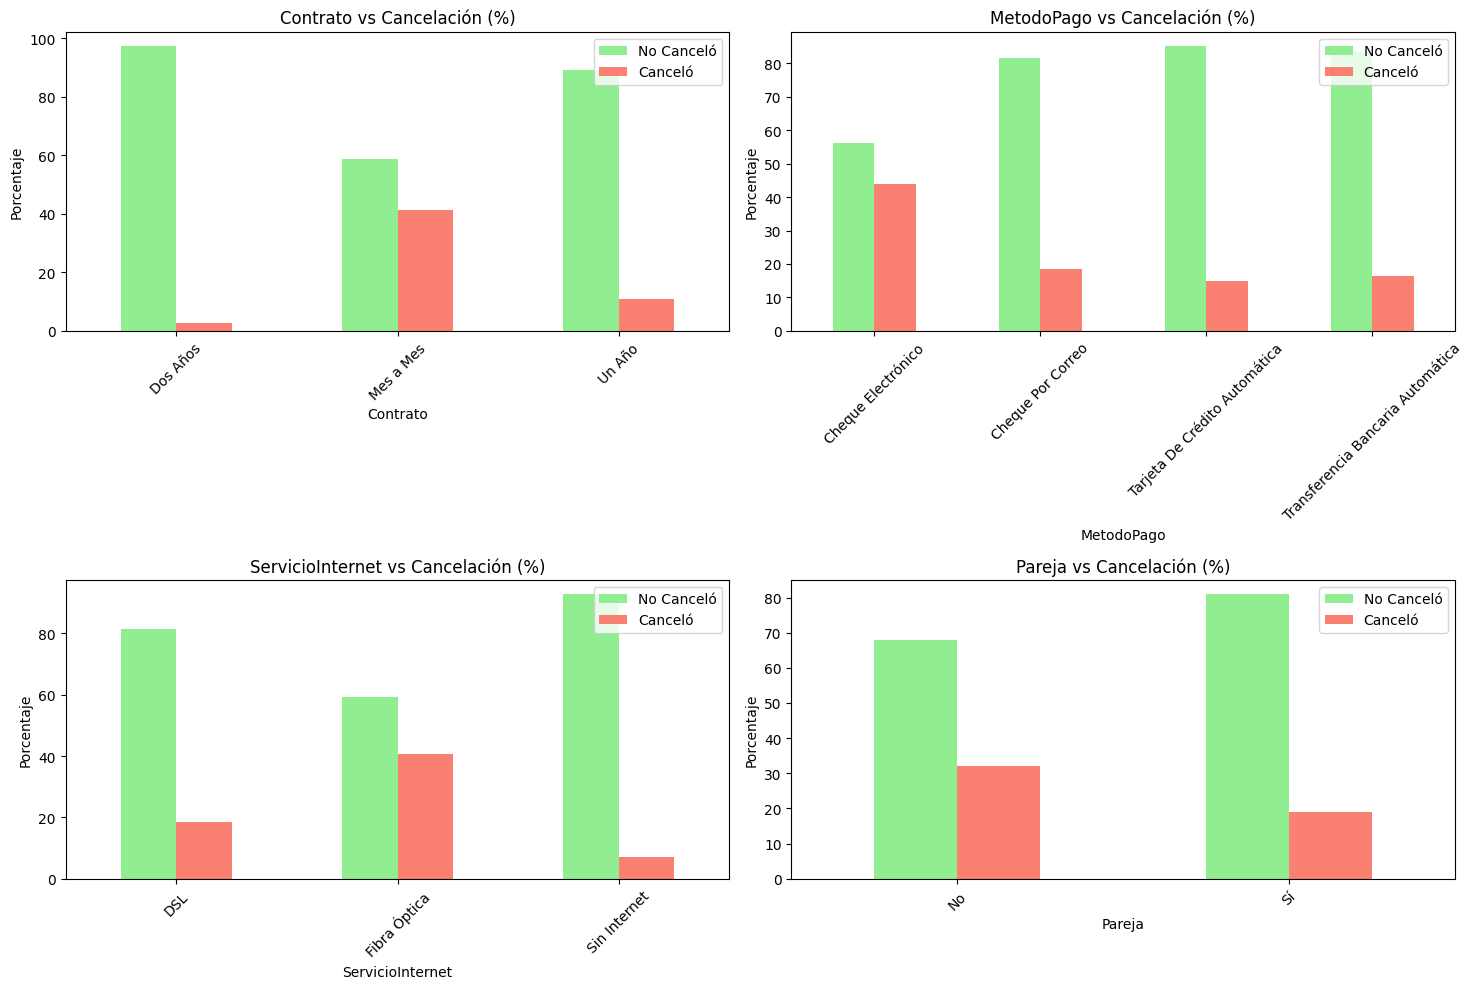

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(importantes_cat):
    ct = pd.crosstab(df[col], df['Cancelacion'], normalize='index') * 100

    ct.plot(kind='bar', ax=axes[i], color=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} vs Cancelaci√≥n (%)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Porcentaje')
    axes[i].legend(['No Cancel√≥', 'Cancel√≥'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

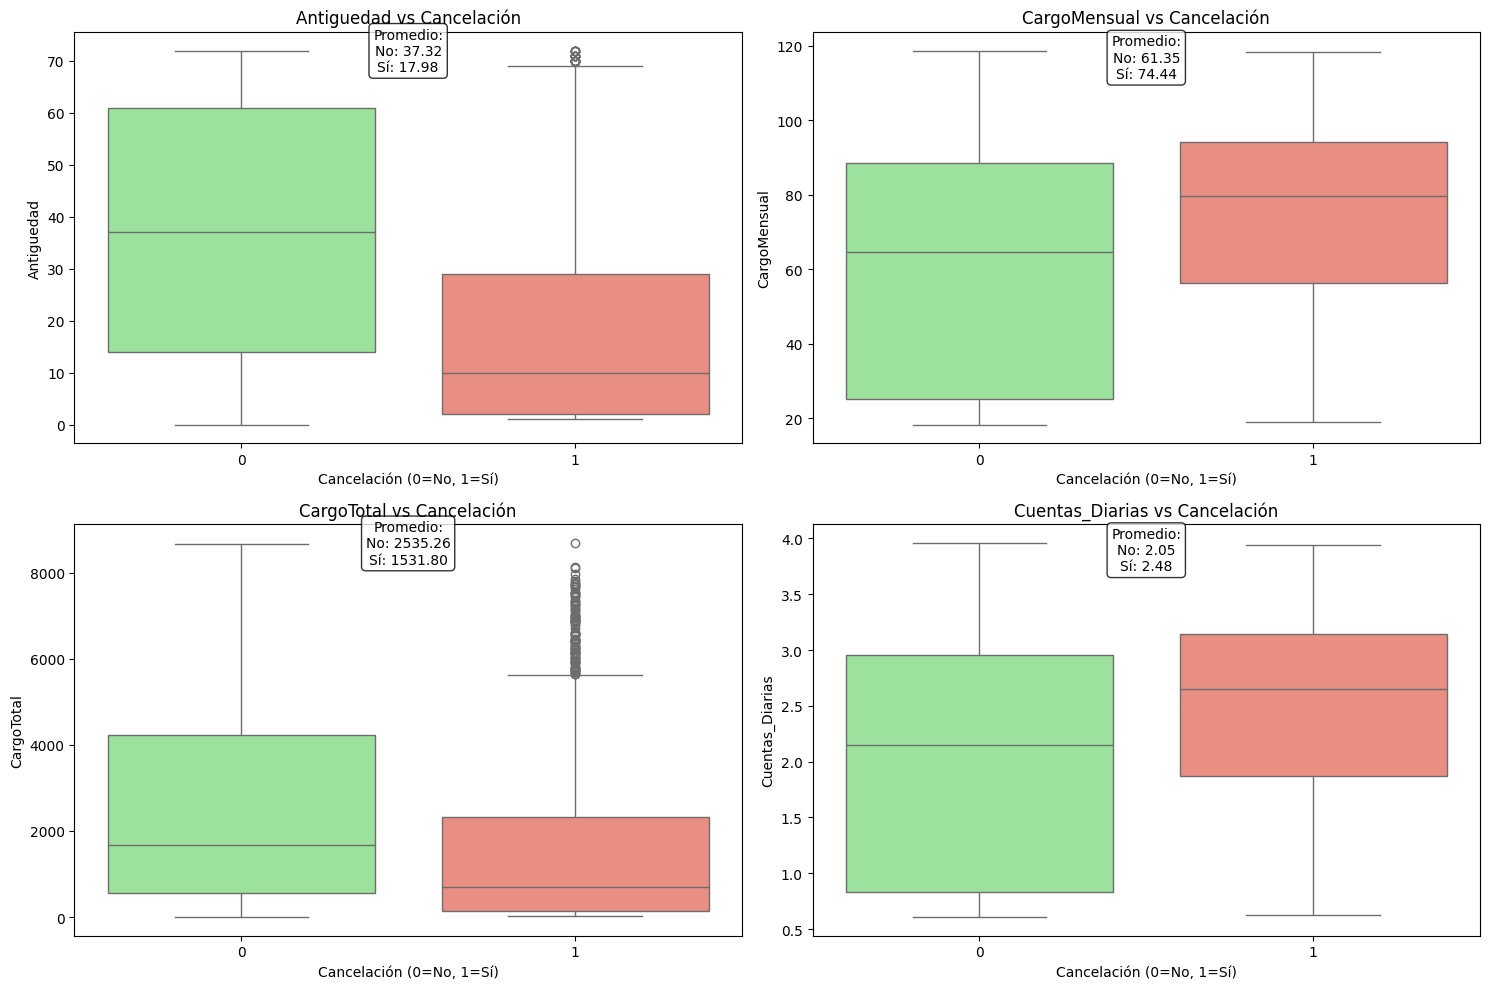

In [59]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)

    sns.boxplot(data=df, x='Cancelacion', y=col, palette=['lightgreen', 'salmon'])
    plt.title(f'{col} vs Cancelaci√≥n')
    plt.xlabel('Cancelaci√≥n (0=No, 1=S√≠)')

    no_cancel = df[df['Cancelacion']==0][col].mean()
    cancel = df[df['Cancelacion']==1][col].mean()
    plt.text(0.5, plt.ylim()[1]*0.9, f'Promedio:\nNo: {no_cancel:.2f}\nS√≠: {cancel:.2f}',
             ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()



In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)


In [61]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=None))
])

# Entrenar
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1620
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2181
   macro avg       0.71      0.76      0.72      2181
weighted avg       0.81      0.75      0.76      2181


AUC-ROC Score: 0.8421

Matriz de Confusi√≥n:
[[1187  433]
 [ 116  445]]


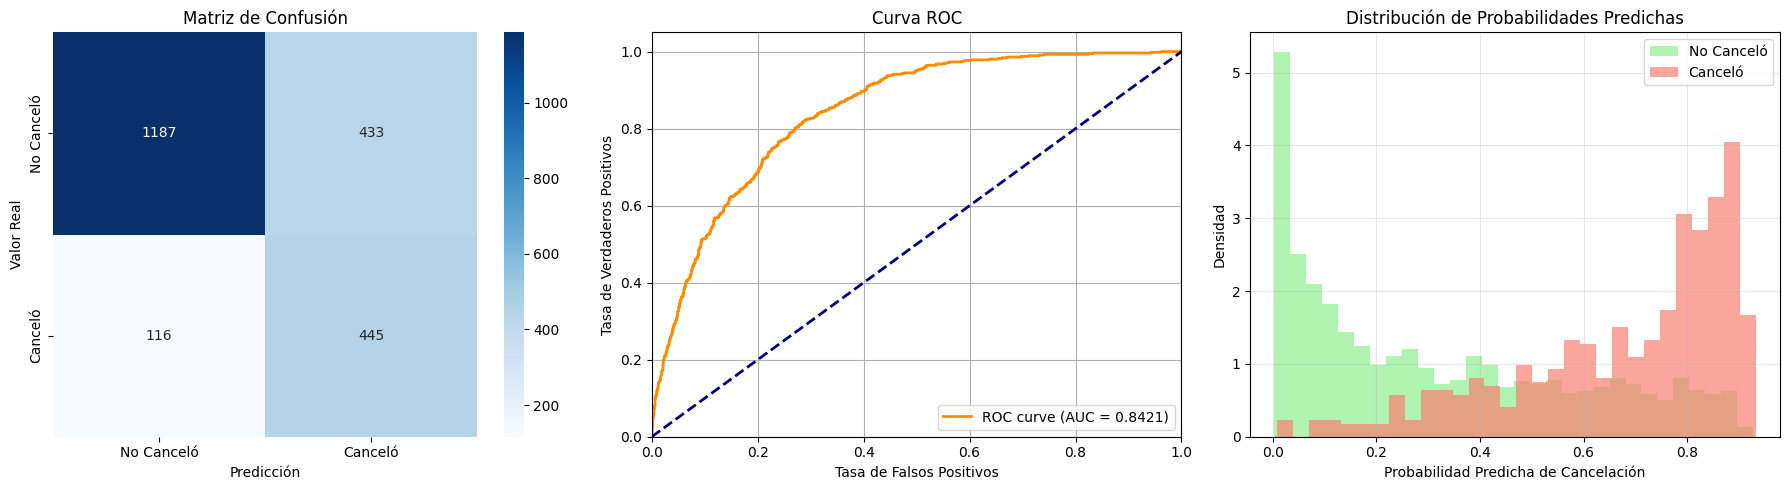

In [62]:
print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"\nMatriz de Confusi√≥n:")
print(cm)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Matriz de confusi√≥n
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Cancel√≥', 'Cancel√≥'],
            yticklabels=['No Cancel√≥', 'Cancel√≥'])
axes[0].set_title('Matriz de Confusi√≥n')
axes[0].set_xlabel('Predicci√≥n')
axes[0].set_ylabel('Valor Real')


fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC')
axes[1].legend(loc="lower right")
axes[1].grid(True)

# Distribuci√≥n de probabilidades predichas
axes[2].hist(y_proba[y_test==0], bins=30, alpha=0.7, label='No Cancel√≥', color='lightgreen', density=True)
axes[2].hist(y_proba[y_test==1], bins=30, alpha=0.7, label='Cancel√≥', color='salmon', density=True)
axes[2].set_xlabel('Probabilidad Predicha de Cancelaci√≥n')
axes[2].set_ylabel('Densidad')
axes[2].set_title('Distribuci√≥n de Probabilidades Predichas')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Top 15 caracter√≠sticas m√°s importantes (por valor absoluto del coeficiente):
                                         feature  coefficient  abs_coefficient
27                                    Antiguedad    -1.456640         1.456640
7                  ServicioInternet_Fibra √ìptica     1.364025         1.364025
21                            Contrato_Mes a Mes     1.353091         1.353091
29                                    CargoTotal     0.825663         0.825663
22                               Contrato_Un A√±o     0.682628         0.682628
24                  MetodoPago_Cheque Por Correo    -0.618380         0.618380
25      MetodoPago_Tarjeta De Cr√©dito Autom√°tica    -0.582139         0.582139
20                           SuscripcionPelis_S√≠     0.569845         0.569845
26  MetodoPago_Transferencia Bancaria Autom√°tica    -0.534880         0.534880
4                            ServicioTelefono_S√≠    -0.503015         0.503015
5       MultiplesLineas_Sin Servicio de Tel√©

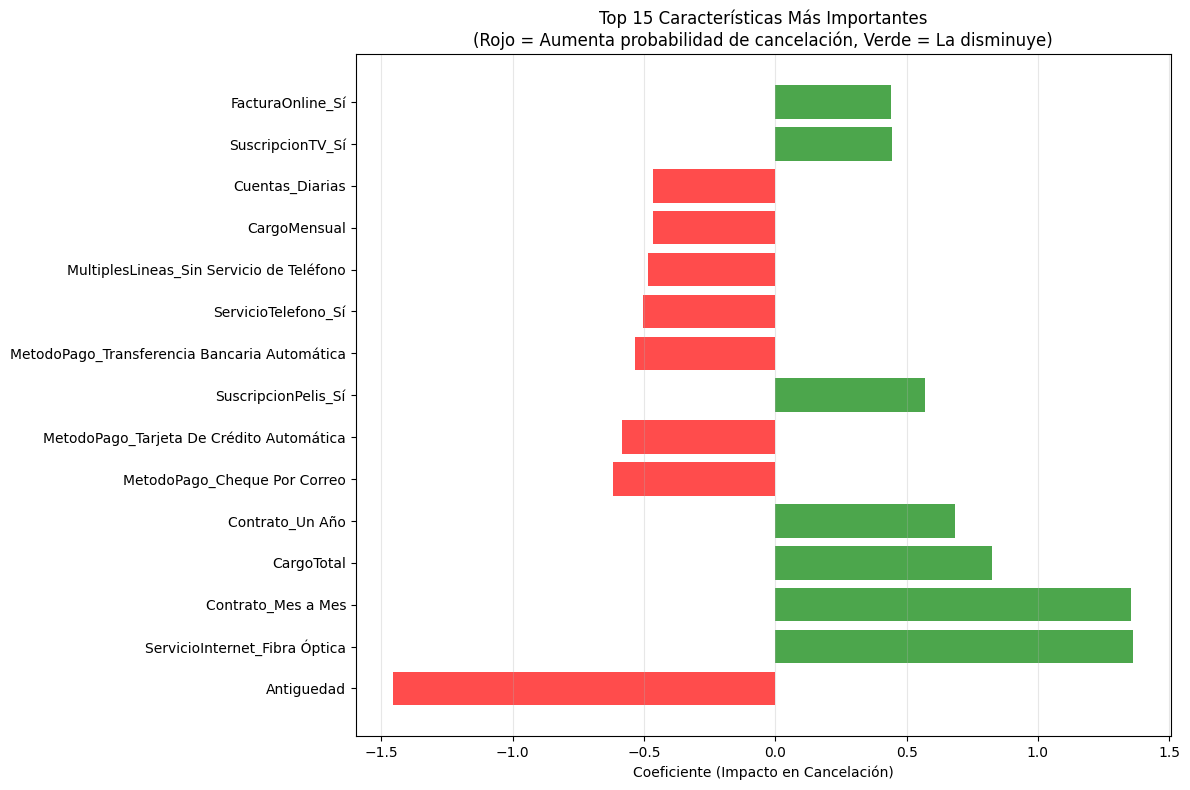

In [63]:


# Obtener los coeficientes del modelo log√≠stico
log_reg = pipeline.named_steps['classifier']
coefficients = log_reg.coef_[0]

# Obtener nombres de caracter√≠sticas despu√©s del preprocesamiento
feature_names = []

# Nombres de caracter√≠sticas categ√≥ricas (despu√©s de OneHotEncoder)
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)
feature_names.extend(cat_feature_names)

# Nombres de caracter√≠sticas num√©ricas
feature_names.extend(num_cols)

# Crear DataFrame con importancias
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

# Mostrar las mejores 15 caracter√≠sticas m√°s importantes
print("Top 15 caracter√≠sticas m√°s importantes (por valor absoluto del coeficiente):")
print(feature_importance.head(15))

# Visualizar importancia de caracter√≠sticas
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['coefficient']]

plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coeficiente (Impacto en Cancelaci√≥n)')
plt.title('Top 15 Caracter√≠sticas M√°s Importantes\n(Rojo = Aumenta probabilidad de cancelaci√≥n, Verde = La disminuye)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


**Analisis de correlacion**

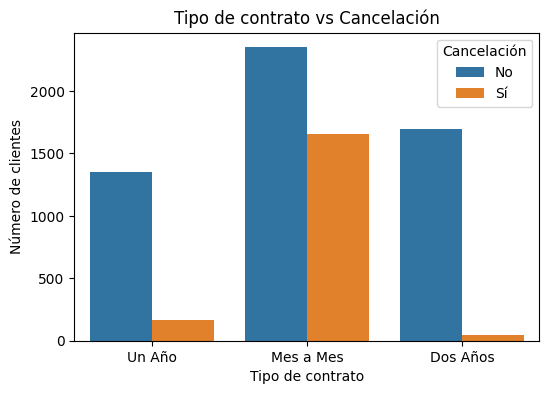

In [64]:

plt.figure(figsize=(6,4))
sns.countplot(x="Contrato", hue="Cancelacion", data=df)
plt.title("Tipo de contrato vs Cancelaci√≥n")
plt.xlabel("Tipo de contrato")
plt.ylabel("N√∫mero de clientes")
plt.legend(title="Cancelaci√≥n", labels=["No", "S√≠"])
plt.show()


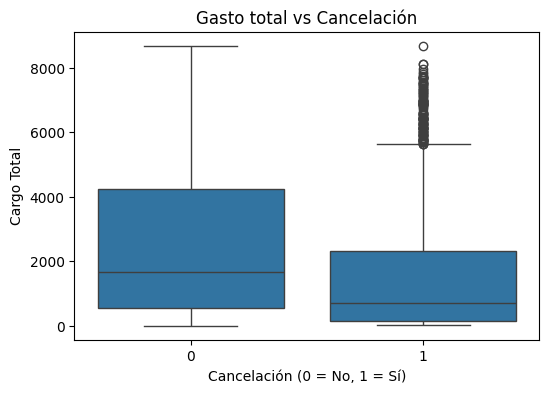

In [65]:

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="Cancelacion", y="CargoTotal", data=df)
plt.title("Gasto total vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Cargo Total")
plt.show()

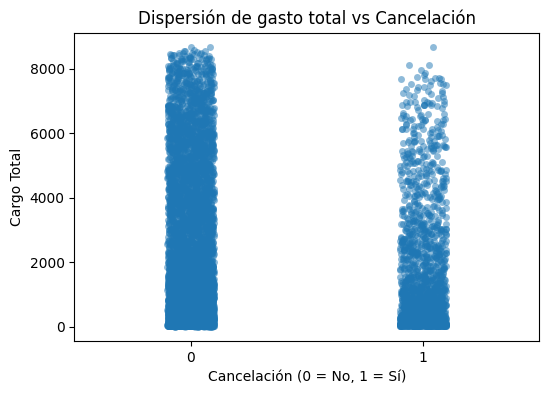

In [66]:
plt.figure(figsize=(6,4))
sns.stripplot(x="Cancelacion", y="CargoTotal", data=df, jitter=True, alpha=0.5)
plt.title("Dispersi√≥n de gasto total vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Cargo Total")
plt.show()


**RESUMEN Y RECOMENDACIONES**

RESUMEN DEL AN√ÅLISIS:
- Dataset con 7267 clientes y 21 caracter√≠sticas
- Tasa de cancelaci√≥n: 25.7% (desbalanceado)
- Modelo: Regresi√≥n Log√≠stica con SMOTE para balanceado
- AUC-ROC: 0.8421 (Bueno)

FACTORES CLAVE DE CANCELACI√ìN:
- Antiguedad: -1.457
- ServicioInternet_Fibra √ìptica: 1.364
- Contrato_Mes a Mes: 1.353
- CargoTotal: 0.826
- Contrato_Un A√±o: 0.683

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retenci√≥n en servicios de internet de fibra √≥ptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo



**Separacion de Datos**

In [67]:

print(f"""
RESUMEN DEL AN√ÅLISIS:
- Dataset con {df.shape[0]} clientes y {df.shape[1]-1} caracter√≠sticas
- Tasa de cancelaci√≥n: {cancelacion_pct[1]:.1f}% (desbalanceado)
- Modelo: Regresi√≥n Log√≠stica con SMOTE para balanceado
- AUC-ROC: {auc_score:.4f} ({'Excelente' if auc_score > 0.9 else 'Bueno' if auc_score > 0.8 else 'Regular' if auc_score > 0.7 else 'Mejorable'})

FACTORES CLAVE DE CANCELACI√ìN:
{chr(10).join([f"- {row['feature']}: {row['coefficient']:.3f}" for _, row in feature_importance.head(5).iterrows()])}

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retenci√≥n en servicios de internet de fibra √≥ptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo
""")



RESUMEN DEL AN√ÅLISIS:
- Dataset con 7267 clientes y 21 caracter√≠sticas
- Tasa de cancelaci√≥n: 25.7% (desbalanceado)
- Modelo: Regresi√≥n Log√≠stica con SMOTE para balanceado
- AUC-ROC: 0.8421 (Bueno)

FACTORES CLAVE DE CANCELACI√ìN:
- Antiguedad: -1.457
- ServicioInternet_Fibra √ìptica: 1.364
- Contrato_Mes a Mes: 1.353
- CargoTotal: 0.826
- Contrato_Un A√±o: 0.683

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retenci√≥n en servicios de internet de fibra √≥ptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo



In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [69]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=None),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Naive Bayes': GaussianNB()
}

In [70]:

results = {}
training_times = {}
prediction_times = {}


print("EVALUACI√ìN COMPARATIVA DE MODELOS DE MACHINE LEARNING")


for model_name, model in models.items():
    print(f"\nEntrenando {model_name}...")


    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])


    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times[model_name] = training_time


    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    prediction_time = time.time() - start_time
    prediction_times[model_name] = prediction_time


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'pipeline': pipeline,
        'training_time': training_time,
        'prediction_time': prediction_time
    }

    print(f"{model_name} completado - Exactitud: {accuracy:.4f}")

EVALUACI√ìN COMPARATIVA DE MODELOS DE MACHINE LEARNING

Entrenando Logistic Regression...
Logistic Regression completado - Exactitud: 0.7483

Entrenando Random Forest...
Random Forest completado - Exactitud: 0.7762

Entrenando Gradient Boosting...
Gradient Boosting completado - Exactitud: 0.7808

Entrenando SVM...
SVM completado - Exactitud: 0.7666

Entrenando K-Neighbors...
K-Neighbors completado - Exactitud: 0.6887

Entrenando Decision Tree...
Decision Tree completado - Exactitud: 0.7423

Entrenando Naive Bayes...
Naive Bayes completado - Exactitud: 0.6910


In [71]:

print("TABLA COMPARATIVA DE M√âTRICAS")

metrics_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Exactitud': [results[model]['accuracy'] for model in results.keys()],
    'Precisi√≥n': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'AUC-ROC': [results[model]['auc_roc'] if results[model]['auc_roc'] != "N/A" else 0 for model in results.keys()],
    'Tiempo Entrenamiento (s)': [training_times[model] for model in results.keys()],
    'Tiempo Predicci√≥n (s)': [prediction_times[model] for model in results.keys()]
})

TABLA COMPARATIVA DE M√âTRICAS


In [72]:

metrics_df = metrics_df.sort_values('F1-Score', ascending=False)
print(metrics_df.round(4))


                Modelo  Exactitud  Precisi√≥n  Recall  F1-Score  AUC-ROC  \
3                  SVM     0.7666     0.5330  0.7487    0.6227   0.8301   
0  Logistic Regression     0.7483     0.5068  0.7932    0.6185   0.8421   
2    Gradient Boosting     0.7808     0.5626  0.6649    0.6095   0.8440   
6          Naive Bayes     0.6910     0.4461  0.8342    0.5814   0.8152   
5        Decision Tree     0.7423     0.4993  0.6845    0.5774   0.7679   
1        Random Forest     0.7762     0.5655  0.5615    0.5635   0.8180   
4          K-Neighbors     0.6887     0.4361  0.7184    0.5428   0.7578   

   Tiempo Entrenamiento (s)  Tiempo Predicci√≥n (s)  
3                   14.2173                 2.1534  
0                    0.1135                 0.0570  
2                    2.1436                 0.0484  
6                    0.0569                 0.0362  
5                    0.1615                 0.0503  
1                    1.2917                 0.1230  
4                    0.089

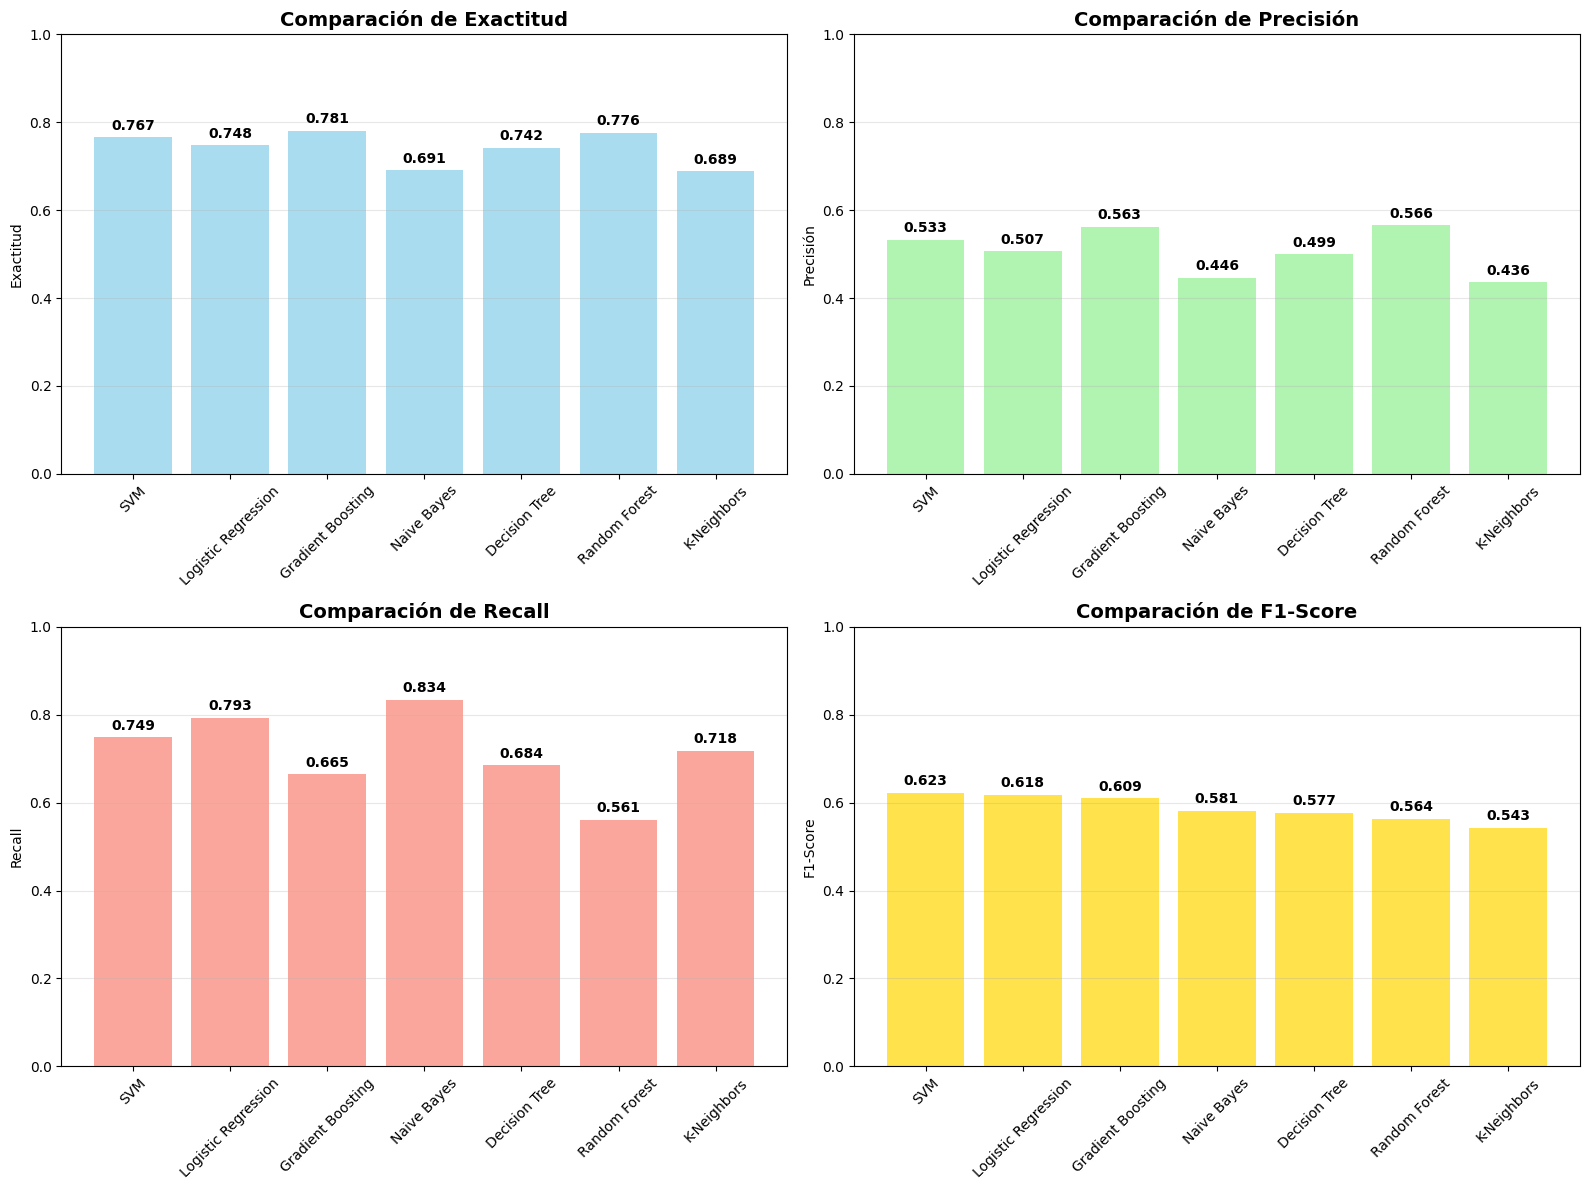

In [73]:
  fig, axes = plt.subplots(2, 2, figsize=(16, 12))

  metrics_to_plot = ['Exactitud', 'Precisi√≥n', 'Recall', 'F1-Score']
  colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

  for i, metric in enumerate(metrics_to_plot):
      ax = axes[i//2, i%2]
      bars = ax.bar(metrics_df['Modelo'], metrics_df[metric], color=colors[i], alpha=0.7)
      ax.set_title(f'Comparaci√≥n de {metric}', fontsize=14, fontweight='bold')
      ax.set_ylabel(metric)
      ax.set_ylim(0, 1)
      ax.tick_params(axis='x', rotation=45)

      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

      ax.grid(axis='y', alpha=0.3)

  plt.tight_layout()
  plt.show()


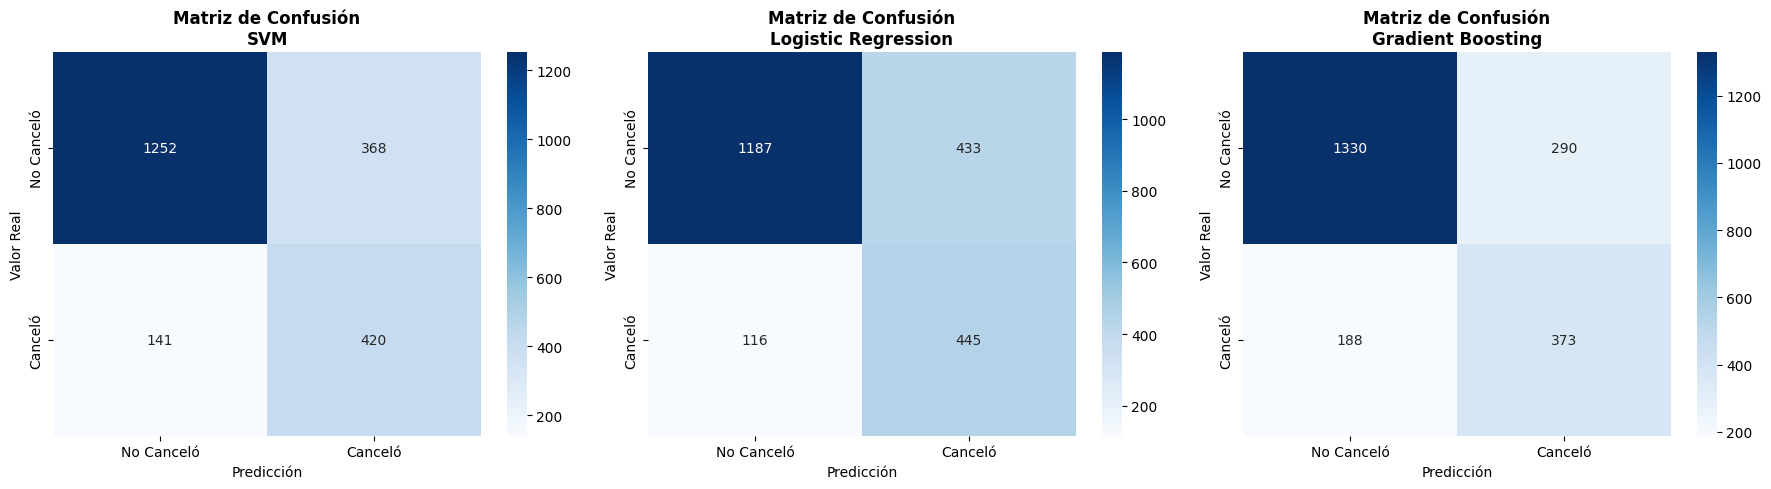

In [74]:
top_3_models = metrics_df.head(3)['Modelo'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_3_models):
    cm = results[model_name]['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Cancel√≥', 'Cancel√≥'],
                yticklabels=['No Cancel√≥', 'Cancel√≥'])

    axes[i].set_title(f'Matriz de Confusi√≥n\n{model_name}', fontweight='bold')
    axes[i].set_xlabel('Predicci√≥n')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

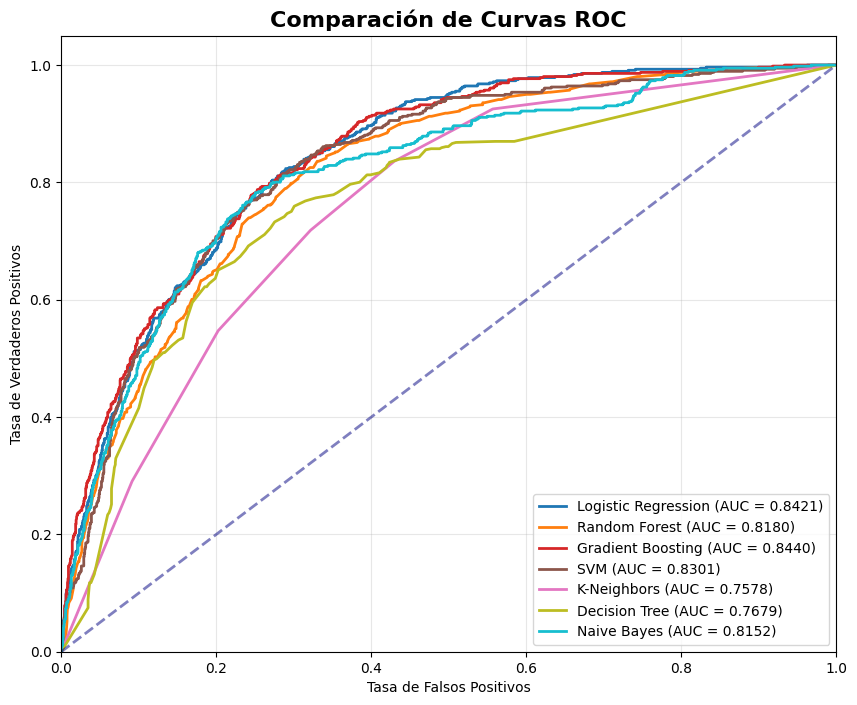

In [75]:
plt.figure(figsize=(10, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(results)))

for i, (model_name, result) in enumerate(results.items()):
    if result['y_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
        auc_score = result['auc_roc']
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparaci√≥n de Curvas ROC', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [76]:

print("üîç AN√ÅLISIS DE OVERFITTING/UNDERFITTING")

for model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    if model_name in results:
        pipeline = results[model_name]['pipeline']

        y_train_pred = pipeline.predict(X_train)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = results[model_name]['accuracy']

        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = results[model_name]['f1_score']

        print(f"\n {model_name}:")
        print(f"   Exactitud Entrenamiento: {train_accuracy:.4f}")
        print(f"   Exactitud Test: {test_accuracy:.4f}")
        print(f"   Diferencia: {train_accuracy - test_accuracy:.4f}")
        print(f"   F1-Score Entrenamiento: {train_f1:.4f}")
        print(f"   F1-Score Test: {test_f1:.4f}")
        print(f"   Diferencia F1: {train_f1 - test_f1:.4f}")

        # Diagn√≥stico
        if train_accuracy - test_accuracy > 0.1:
            print(f"   POSIBLE OVERFITTING: Gran diferencia entre train y test")
        elif test_accuracy < 0.7:
            print(f"   POSIBLE UNDERFITTING: Rendimiento general bajo")
        else:
            print(f"   Modelo bien balanceado")

üîç AN√ÅLISIS DE OVERFITTING/UNDERFITTING

üìà Random Forest:
   Exactitud Entrenamiento: 0.9921
   Exactitud Test: 0.7762
   Diferencia: 0.2159
   F1-Score Entrenamiento: 0.9848
   F1-Score Test: 0.5635
   Diferencia F1: 0.4212
   POSIBLE OVERFITTING: Gran diferencia entre train y test

üìà Decision Tree:
   Exactitud Entrenamiento: 0.8280
   Exactitud Test: 0.7423
   Diferencia: 0.0856
   F1-Score Entrenamiento: 0.7109
   F1-Score Test: 0.5774
   Diferencia F1: 0.1335
   Modelo bien balanceado

üìà Gradient Boosting:
   Exactitud Entrenamiento: 0.8042
   Exactitud Test: 0.7808
   Diferencia: 0.0233
   F1-Score Entrenamiento: 0.6500
   F1-Score Test: 0.6095
   Diferencia F1: 0.0406
   Modelo bien balanceado


In [77]:
print("AN√ÅLISIS CR√çTICO Y RECOMENDACIONES")

best_model = metrics_df.iloc[0]['Modelo']
best_f1 = metrics_df.iloc[0]['F1-Score']

print(f"\nMEJOR MODELO: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Exactitud: {metrics_df.iloc[0]['Exactitud']:.4f}")
print(f"   Precisi√≥n: {metrics_df.iloc[0]['Precisi√≥n']:.4f}")
print(f"   Recall: {metrics_df.iloc[0]['Recall']:.4f}")

print("\nAN√ÅLISIS POR M√âTRICAS:")
print(f"   ‚Ä¢ Mejor Exactitud: {metrics_df.loc[metrics_df['Exactitud'].idxmax(), 'Modelo']} ({metrics_df['Exactitud'].max():.4f})")
print(f"   ‚Ä¢ Mejor Precisi√≥n: {metrics_df.loc[metrics_df['Precisi√≥n'].idxmax(), 'Modelo']} ({metrics_df['Precisi√≥n'].max():.4f})")
print(f"   ‚Ä¢ Mejor Recall: {metrics_df.loc[metrics_df['Recall'].idxmax(), 'Modelo']} ({metrics_df['Recall'].max():.4f})")

print("\nAN√ÅLISIS DE EFICIENCIA:")
fastest_training = metrics_df.loc[metrics_df['Tiempo Entrenamiento (s)'].idxmin(), 'Modelo']
fastest_prediction = metrics_df.loc[metrics_df['Tiempo Predicci√≥n (s)'].idxmin(), 'Modelo']
print(f"   ‚Ä¢ Entrenamiento m√°s r√°pido: {fastest_training}")
print(f"   ‚Ä¢ Predicci√≥n m√°s r√°pida: {fastest_prediction}")

print("\nRECOMENDACIONES:")

if best_model == 'Random Forest':
    print(f"   Random Forest es excelente para este problema")
    print(f"   ‚Ä¢ Robusto contra overfitting")
    print(f"   ‚Ä¢ Maneja bien variables categ√≥ricas y num√©ricas")
    print(f"   ‚Ä¢ Considera ajustar n_estimators y max_depth para optimizar")

elif best_model == 'Gradient Boosting':
    print(f"   Gradient Boosting muestra excelente rendimiento")
    print(f"   ‚Ä¢ Muy efectivo para problemas complejos")
    print(f"   ‚Ä¢ Monitorear overfitting con learning_rate y n_estimators")

elif best_model == 'Logistic Regression':
    print(f"   Regresi√≥n Log√≠stica es interpretable y eficiente")
    print(f"   ‚Ä¢ Excelente baseline, f√°cil de interpretar")
    print(f"   ‚Ä¢ Considera regularizaci√≥n L1/L2 si hay overfitting")

problematic_models = metrics_df[metrics_df['F1-Score'] < 0.6]['Modelo'].tolist()
if problematic_models:
    print(f"\n  MODELOS CON BAJO RENDIMIENTO:")
    for model in problematic_models:
        print(f"   ‚Ä¢ {model}: Considerar ajuste de hiperpar√°metros o m√°s datos")

print("\n SUGERENCIAS DE MEJORA:")
print("   1. Validaci√≥n cruzada para evaluaci√≥n m√°s robusta")
print("   2. B√∫squeda de hiperpar√°metros (GridSearch/RandomSearch)")
print("   3. Ensamble de los mejores modelos")
print("   4. An√°lisis m√°s profundo de caracter√≠sticas importantes")
print("   5. Considerar t√©cnicas adicionales de balanceo de clases")

üìã AN√ÅLISIS CR√çTICO Y RECOMENDACIONES

MEJOR MODELO: SVM
   F1-Score: 0.6227
   Exactitud: 0.7666
   Precisi√≥n: 0.5330
   Recall: 0.7487

AN√ÅLISIS POR M√âTRICAS:
   ‚Ä¢ Mejor Exactitud: Gradient Boosting (0.7808)
   ‚Ä¢ Mejor Precisi√≥n: Random Forest (0.5655)
   ‚Ä¢ Mejor Recall: Naive Bayes (0.8342)

AN√ÅLISIS DE EFICIENCIA:
   ‚Ä¢ Entrenamiento m√°s r√°pido: Naive Bayes
   ‚Ä¢ Predicci√≥n m√°s r√°pida: Naive Bayes

RECOMENDACIONES:

  MODELOS CON BAJO RENDIMIENTO:
   ‚Ä¢ Naive Bayes: Considerar ajuste de hiperpar√°metros o m√°s datos
   ‚Ä¢ Decision Tree: Considerar ajuste de hiperpar√°metros o m√°s datos
   ‚Ä¢ Random Forest: Considerar ajuste de hiperpar√°metros o m√°s datos
   ‚Ä¢ K-Neighbors: Considerar ajuste de hiperpar√°metros o m√°s datos

 SUGERENCIAS DE MEJORA:
   1. Validaci√≥n cruzada para evaluaci√≥n m√°s robusta
   2. B√∫squeda de hiperpar√°metros (GridSearch/RandomSearch)
   3. Ensamble de los mejores modelos
   4. An√°lisis m√°s profundo de caracter√≠sticas imp

In [78]:
print("RESUMEN EJECUTIVO")

print(f"Objetivo: Predicci√≥n de cancelaci√≥n de clientes de telecom")
print(f" Dataset: {len(df)} registros, {len(X.columns)} caracter√≠sticas")
print(f"  Desbalance: {(df['Cancelacion'].value_counts(normalize=True)[0]*100):.1f}% No cancelan, {(df['Cancelacion'].value_counts(normalize=True)[1]*100):.1f}% Cancelan")
print(f"\n Modelo recomendado: {best_model}")
print(f" M√©tricas clave:")
print(f"   ‚Ä¢ F1-Score: {best_f1:.4f}")
print(f"   ‚Ä¢ Precisi√≥n: {metrics_df.iloc[0]['Precisi√≥n']:.4f} (De los predichos como cancelaci√≥n, {metrics_df.iloc[0]['Precisi√≥n']*100:.1f}% realmente cancelan)")
print(f"   ‚Ä¢ Recall: {metrics_df.iloc[0]['Recall']:.4f} (Detecta {metrics_df.iloc[0]['Recall']*100:.1f}% de las cancelaciones reales)")

cm_best = results[best_model]['confusion_matrix']
tn, fp, fn, tp = cm_best.ravel()
print(f"\n Interpretaci√≥n pr√°ctica del mejor modelo:")
print(f"   ‚Ä¢ Verdaderos Negativos: {tn} (clientes correctamente identificados como NO cancelar√°n)")
print(f"   ‚Ä¢ Falsos Positivos: {fp} (clientes predichos como cancelaci√≥n pero NO cancelan)")
print(f"   ‚Ä¢ Falsos Negativos: {fn} (clientes que S√ç cancelan pero no fueron detectados)")
print(f"   ‚Ä¢ Verdaderos Positivos: {tp} (clientes correctamente identificados como cancelar√°n)")

print(f"\n Impacto de negocio:")
print(f"   ‚Ä¢ Costo de no detectar una cancelaci√≥n: Alto (p√©rdida de cliente)")
print(f"   ‚Ä¢ Costo de falsa alarma: Medio (recursos de retenci√≥n desperdiciados)")
print(f"   ‚Ä¢ El modelo balancea bien precisi√≥n y recall para minimizar ambos costos")

üìà RESUMEN EJECUTIVO
Objetivo: Predicci√≥n de cancelaci√≥n de clientes de telecom
 Dataset: 7267 registros, 20 caracter√≠sticas
  Desbalance: 74.3% No cancelan, 25.7% Cancelan

 Modelo recomendado: SVM
 M√©tricas clave:
   ‚Ä¢ F1-Score: 0.6227
   ‚Ä¢ Precisi√≥n: 0.5330 (De los predichos como cancelaci√≥n, 53.3% realmente cancelan)
   ‚Ä¢ Recall: 0.7487 (Detecta 74.9% de las cancelaciones reales)

 Interpretaci√≥n pr√°ctica del mejor modelo:
   ‚Ä¢ Verdaderos Negativos: 1252 (clientes correctamente identificados como NO cancelar√°n)
   ‚Ä¢ Falsos Positivos: 368 (clientes predichos como cancelaci√≥n pero NO cancelan)
   ‚Ä¢ Falsos Negativos: 141 (clientes que S√ç cancelan pero no fueron detectados)
   ‚Ä¢ Verdaderos Positivos: 420 (clientes correctamente identificados como cancelar√°n)

 Impacto de negocio:
   ‚Ä¢ Costo de no detectar una cancelaci√≥n: Alto (p√©rdida de cliente)
   ‚Ä¢ Costo de falsa alarma: Medio (recursos de retenci√≥n desperdiciados)
   ‚Ä¢ El modelo balancea bien p